# SIR Simulations with Varying Contact Matrices / Population Structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SIR(S0,I0,R0, pC, gamma, t_max, stepsize): # replace beta with pC (probability of contact)
    T = np.arange(0, t_max+stepsize, stepsize)
    G = len(S0)
    S = np.zeros([len(T), G]) # length T by G
    I = np.zeros([len(T), G])
    R = np.zeros([len(T), G])

    for idx,t in enumerate(T):
        if idx == 0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:]+I[0,:]+R[0,:] # N is an array of population sizes for each group
        else:
            Q = np.diag(S[idx-1,:]) @ pC @ I[idx-1,:] / N  #Susceptible individuals matrix np.matmul(A,B) - A@B matrix multiplication
            dS_dt = -Q
            dI_dt = Q - gamma * I[idx-1,:]
            dR_dt = gamma * I[idx-1,:]

            S[idx] = S[idx-1,:] + dS_dt * stepsize # changed to arrays
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

Notice we can pass in different number of groups.

(0.0, 26.25)

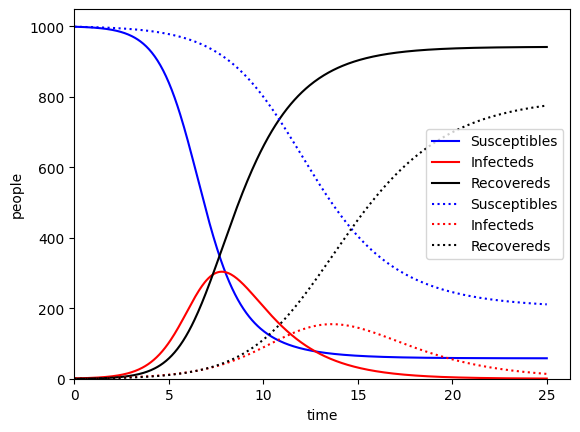

In [3]:
# SIR(S0,I0,R0, pC, gamma, t_max, stepsize):
pC = [[1.5, 0],
      [0, 1.0]]
S,I,R,T = SIR([999, 999], [1,1] , [0,0],
             pC,0.5,25,0.05)

fig, ax = plt.subplots()
ls = ['-', ':']
for group in [0,1]:
    ax.plot(T,S[:,group], color = 'b', ls=ls[group], label='Susceptibles')
    ax.plot(T,I[:,group], color = 'r', ls=ls[group], label='Infecteds')
    ax.plot(T,R[:,group], color = 'k', ls=ls[group], label='Recovereds')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)